# K-Means contraint

Les [k-means](https://en.wikipedia.org/wiki/K-means_clustering) construisent des clusters qui ne sont pas forcément équilibrés. Comment modifier l'algorithme original pour que ce soit le cas ?

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Un échantillon aléatoire

In [2]:
from sklearn.datasets import make_blobs
n_samples = 100
data = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=1.0, 
                  center_box=(-10.0, 0.0), shuffle=True, random_state=2)
X1 = data[0]
data = make_blobs(n_samples=n_samples//2, n_features=2, centers=2, cluster_std=1.0, 
                  center_box=(0.0, 10.0), shuffle=True, random_state=2)
X2 = data[0]

import numpy
X = numpy.vstack([X1, X2])
X.shape

(150, 2)

In [3]:
%matplotlib inline

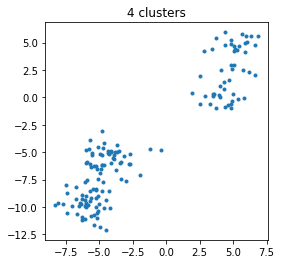

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(X[:, 0], X[:, 1], '.')
ax.set_title('4 clusters');

## k-means classique

Le modèles des [k-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) classique.

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(X)
cl = km.predict(X)

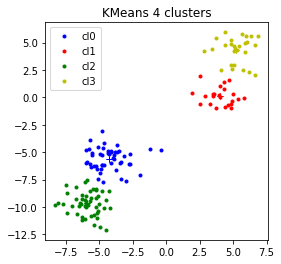

In [6]:
colors = 'brgy'
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], colors[i] + '.', label='cl%d' % i)
    x = [km.cluster_centers_[i, 0], km.cluster_centers_[i, 0]]
    y = [km.cluster_centers_[i, 1], km.cluster_centers_[i, 1]]
    ax.plot(x, y, colors[i] + '+')
ax.set_title('KMeans 4 clusters')
ax.legend();

## k-means contraint

Et maintenant la version où chaque cluster contient approximativement le même nombre de points.

**not finished yet**

In [7]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [8]:
from mlinsights.mlmodel import ConstraintKMeans
km = ConstraintKMeans(n_clusters=4, balanced_predictions=True)
km.fit(X)
cl = km.predict(X)

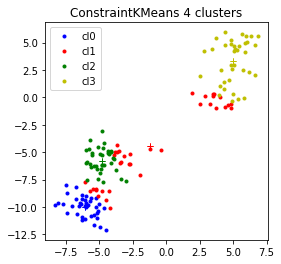

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(0, max(cl)+1):
    ax.plot(X[cl == i, 0], X[cl == i, 1], colors[i] + '.', label='cl%d' % i)
    x = [km.cluster_centers_[i, 0], km.cluster_centers_[i, 0]]
    y = [km.cluster_centers_[i, 1], km.cluster_centers_[i, 1]]
    ax.plot(x, y, colors[i] + '+')
ax.set_title('ConstraintKMeans 4 clusters')
ax.legend();

L'algorithme essaye d'échanger des points entre deux classes balancées, l'échange est conservé si cela améliore l'inertie du nuage total, voir [Same-size k-Means Variation](https://elki-project.github.io/tutorial/same-size_k_means).

## k-means contraint - variantes

Une autre variante plus simple qui consiste à affecter d'abord les points proches du centre le plus proche, les points les plus éloignés sont traités en dernier et affectés à ce qui reste. Les clusters construits ne sont plus convexes.

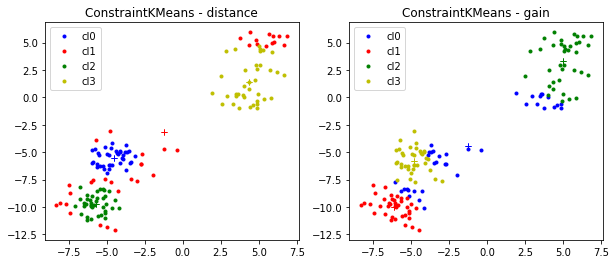

In [10]:
from mlinsights.mlmodel import ConstraintKMeans

res = {}
for strategy in ['distance', 'gain']:
    km = ConstraintKMeans(n_clusters=4, balanced_predictions=True, strategy=strategy)
    km.fit(X)
    cl = km.predict(X)
    res[strategy] = (cl, km)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
nb = 0
for k, v in sorted(res.items()):
    ax = axs[nb]
    cl, km = v
    for i in range(0, max(cl)+1):
        ax.plot(X[cl == i, 0], X[cl == i, 1], colors[i] + '.', label='cl%d' % i)
        x = [km.cluster_centers_[i, 0], km.cluster_centers_[i, 0]]
        y = [km.cluster_centers_[i, 1], km.cluster_centers_[i, 1]]
        ax.plot(x, y, colors[i] + '+')
    ax.set_title('ConstraintKMeans - ' + k)
    ax.legend()
    nb += 1

On vérifie que la version *distance* ne paraît pas optimal à la périphérie des clusters. La version *gain* n'est pas encore parfaite. On regarde le résultat sans initialisation préalable de avec un *k-means* classique.

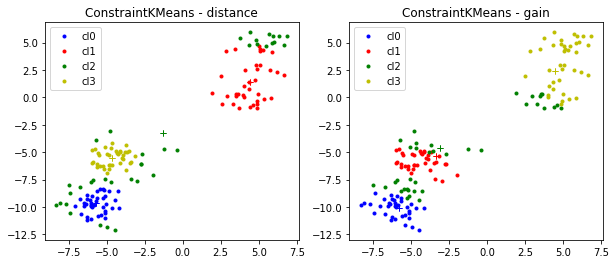

In [11]:
from mlinsights.mlmodel import ConstraintKMeans

res = {}
for strategy in ['distance', 'gain']:
    km = ConstraintKMeans(n_clusters=4, balanced_predictions=True,
                          strategy=strategy, kmeans0=False,
                          random_state=0)
    km.fit(X)
    cl = km.predict(X)
    res[strategy] = (cl, km)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
nb = 0
for k, v in sorted(res.items()):
    ax = axs[nb]
    cl, km = v
    for i in range(0, max(cl)+1):
        ax.plot(X[cl == i, 0], X[cl == i, 1], colors[i] + '.', label='cl%d' % i)
        x = [km.cluster_centers_[i, 0], km.cluster_centers_[i, 0]]
        y = [km.cluster_centers_[i, 1], km.cluster_centers_[i, 1]]
        ax.plot(x, y, colors[i] + '+')
    ax.set_title('ConstraintKMeans - ' + k)
    ax.legend()
    nb += 1